In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam

import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pickle
import pandas as pd
import numpy as np
import random

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [3]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [4]:
data = pd.read_csv('german-traffic-signs/signnames.csv')

In [5]:
data.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [6]:
with open('german-traffic-signs/train.p', mode = 'rb') as training:
  train = pickle.load(training)

with open('german-traffic-signs/valid.p', mode = 'rb') as validation:
  valid = pickle.load(validation)

with open('german-traffic-signs/test.p', mode = 'rb') as testing:
  test = pickle.load(testing)

In [7]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [8]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


image label = 4


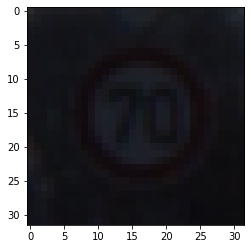

In [9]:
index = np.random.randint(1,len(X_train))
plt.imshow(X_train[index])
print("image label = {}" .format(y_train[index]))

In [10]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train,y_train)

In [11]:
def preprocessing(img):
  #converting to grayscale

  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  #histogram equalization

  img = cv2.equalizeHist(img)

  #normalization

  img = img/255

  return img

In [12]:
X_train_processed = np.array(list(map(preprocessing,X_train)))

X_validation_processed = np.array(list(map(preprocessing,X_validation)))

X_test_processed = np.array(list(map(preprocessing,X_test)))

In [13]:
X_train_processed = X_train_processed.reshape(34799,32,32,1)
X_test_processed = X_test_processed.reshape(12630,32,32,1)
X_validation_processed = X_validation_processed.reshape(4410,32,32,1)



In [14]:
print(X_train_processed.shape)
print(X_test_processed.shape)
print(X_validation_processed.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


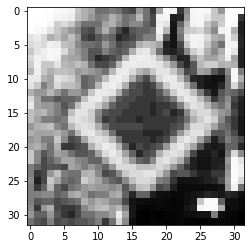

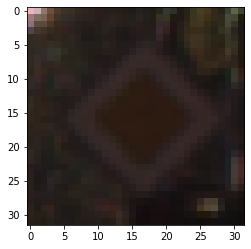

In [15]:
i = np.random.randint(1,len(X_train))
plt.imshow(X_train_processed[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i].squeeze())

In [16]:
### Deep CNN Model

model = Sequential()

model.add(Conv2D(32,(5,5), activation='relu', input_shape = (32,32,1)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(64,(5,5), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(43,activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

In [17]:
#compile our model 
#if only 2 the binay_crossentropy
model.compile(Adam(lr = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [18]:
history = model.fit(X_train_processed, 
                    y_train, 
                    batch_size=500,
                    epochs = 50,
                    verbose = 1,
                    validation_data=(X_validation_processed, y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 7s 215us/step - loss: 3.5406 - accuracy: 0.0640 - val_loss: 3.4780 - val_accuracy: 0.1726
Epoch 2/50
34799/34799 [==============================] - 1s 25us/step - loss: 3.2909 - accuracy: 0.1563 - val_loss: 3.1111 - val_accuracy: 0.3222
Epoch 3/50
34799/34799 [==============================] - 1s 25us/step - loss: 2.7895 - accuracy: 0.3124 - val_loss: 2.5196 - val_accuracy: 0.3989
Epoch 4/50
34799/34799 [==============================] - 1s 25us/step - loss: 2.2909 - accuracy: 0.4074 - val_loss: 2.0448 - val_accuracy: 0.4787
Epoch 5/50
34799/34799 [==============================] - 1s 25us/step - loss: 1.9305 - accuracy: 0.4764 - val_loss: 1.7001 - val_accuracy: 0.5408
Epoch 6/50
34799/34799 [==============================] - 1s 25us/step - loss: 1.6721 - accuracy: 0.5285 - val_loss: 1.4440 - val_accuracy: 0.6136
Epoch 7/50
34799/34799 [==============================] - 1s 25us/st

In [19]:
## Evaluate Model Performance

score = model.evaluate(X_test_processed, y_test)

print('Test Accuraacy : ',score[1])

12630/12630 [==============================] - 1s 78us/step
Test Accuraacy :  0.9093428254127502


In [20]:
history.history.keys()


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

Text(0.5, 0, 'epochs')

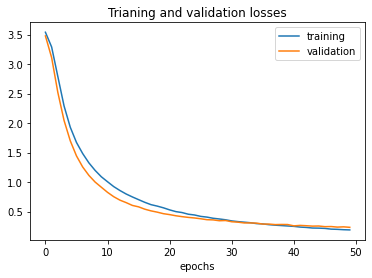

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Trianing and validation losses')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

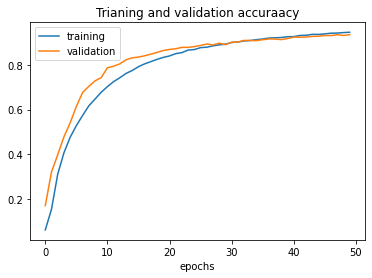

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Trianing and validation accuraacy')
plt.xlabel('epochs')

In [23]:
prediction = model.predict_classes(X_test_processed)

y_true_label = y_test 

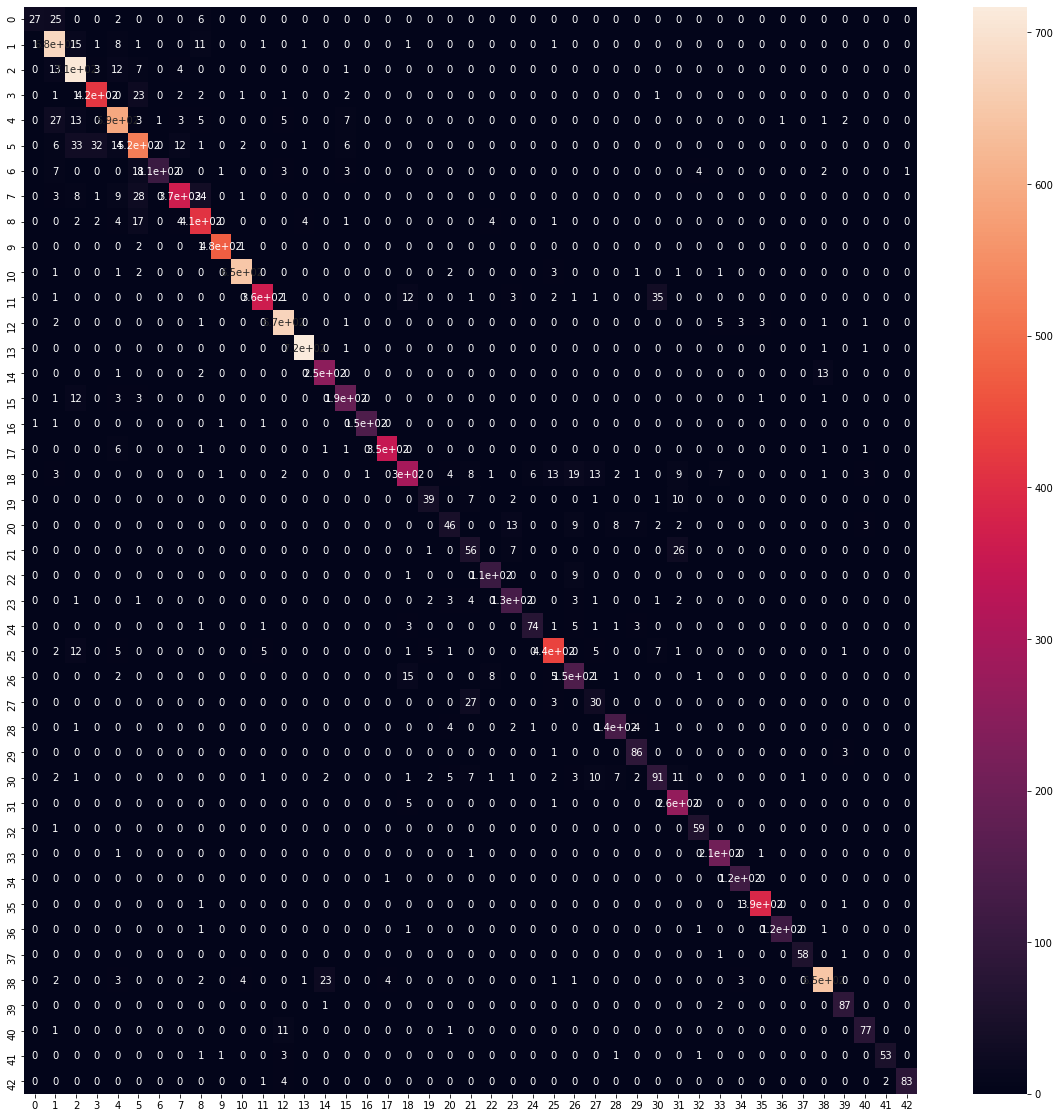

In [24]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_true_label, prediction)

plt.figure(figsize=(20,20))

sns.heatmap(matrix, annot = True)

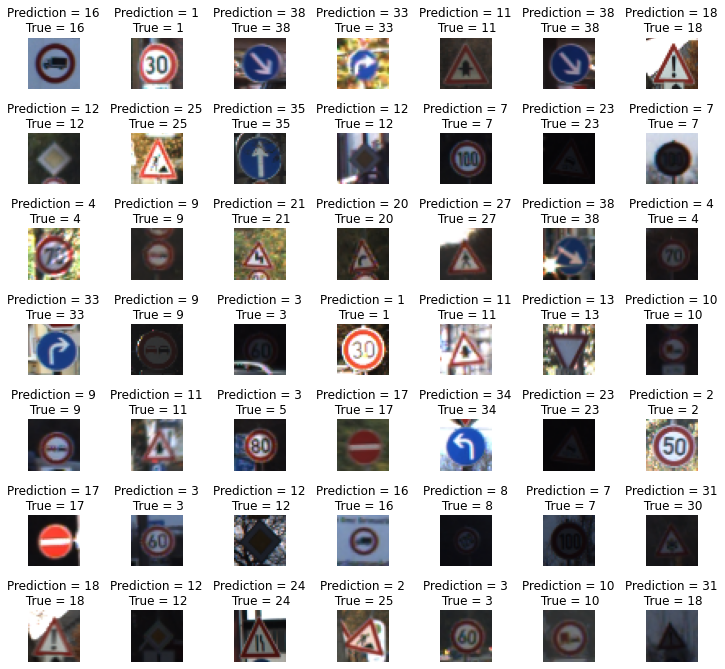

In [25]:
 L = 7
 W = 7

 fig, axes = plt.subplots(L,W,figsize = (12,12))

 axes = axes.ravel()

 for i in range(L*W):
   axes[i].imshow(X_test[i])
   axes[i].set_title('Prediction = {}\n True = {}'.format(prediction[i], y_true_label[i]))
   axes[i].axis('off')


plt.subplots_adjust(wspace=1)

In [26]:
model.save('my_model.h5')